# EDA

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics.pairwise import cosine_similarity
rating_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"
rating_df = pd.read_csv(rating_url)

rating_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233306 entries, 0 to 233305
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   user    233306 non-null  int64  
 1   item    233306 non-null  object 
 2   rating  233306 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.3+ MB


In [ ]:
print(f"Number of users : {len(rating_df['user'].unique())}")

Number of users : 33901


In [ ]:
print(f"Number of items : {len(rating_df['item'].unique())}")

Number of items : 126


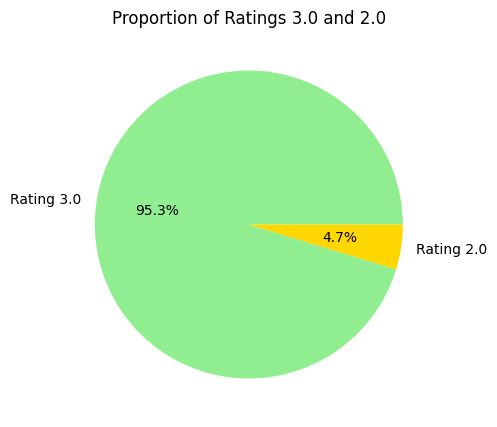

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of ratings for each rating level
rating_counts = rating_df['rating'].value_counts()

# Extract the counts for ratings 3.0 and 2.0
rating_3_count = rating_counts[3.0]
rating_2_count = rating_counts[2.0]

# Create a list of colors for the pie chart
colors = ['lightgreen', 'gold']

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie([rating_3_count, rating_2_count], labels=['Rating 3.0', 'Rating 2.0'], colors=colors, autopct='%1.1f%%')
plt.title('Proportion of Ratings 3.0 and 2.0')
plt.show()


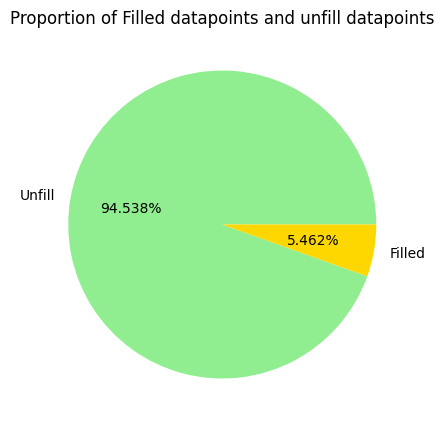

In [ ]:
sum_datapoints = len(rating_df['user'].unique()) * len(rating_df['item'].unique())

sum_filled_datapoints = len(rating_df)

plt.figure(figsize=(5, 5))
plt.pie([ sum_datapoints - sum_filled_datapoints,sum_filled_datapoints], labels=['Unfill', 'Filled'], colors=colors, autopct='%1.3f%%')
plt.title('Proportion of Filled datapoints and unfill datapoints')
plt.show()

# Convert to user-item matrix

In [ ]:
rating_sparse_df = rating_df.pivot(index='user', columns='item',
                                   values='rating').fillna(0).reset_index().rename_axis(index=None, columns=None)
rating_sparse_df = rating_sparse_df.set_index('user')
rating_sparse_df.head()

,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
user,,,,,,,,,,,,,,,,,,,,,
2,0.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,3.0,...,0.0,2.0,0.0,3.0,0.0,2.0,2.0,0.0,3.0,0.0
4,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0
5,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_set = rating_sparse_df.copy()

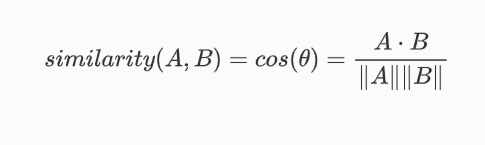

In [ ]:
item_similarity = cosine_similarity(train_set.T)
item_similarity.shape

(126, 126)

In [ ]:
item_sim_df = pd.DataFrame(item_similarity,index=train_set.columns,columns = train_set.columns)
item_sim_df.head()

,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
AI0111EN,1.000000,0.105708,0.093261,0.158023,0.081823,0.071958,0.050822,0.035848,0.060667,0.043973,...,0.101413,0.015380,0.085273,0.004320,0.024105,0.001451,0.005567,0.018910,0.010874,0.003331
BC0101EN,0.105708,1.000000,0.381801,0.262163,0.384545,0.312488,0.150896,0.080234,0.113649,0.126583,...,0.120289,0.086303,0.160478,0.044557,0.005751,0.024492,0.005313,0.004512,0.205472,0.011523
BC0201EN,0.093261,0.381801,1.000000,0.338096,0.165998,0.139687,0.091785,0.054832,0.086070,0.072654,...,0.100588,0.023002,0.083121,0.010301,0.009832,0.006362,0.002271,0.007713,0.072589,0.004415
BC0202EN,0.158023,0.262163,0.338096,1.000000,0.111778,0.099261,0.065476,0.055781,0.075561,0.057100,...,0.068099,0.009607,0.058334,0.010508,0.000000,0.006883,0.000000,0.000000,0.017575,0.000000
BD0101EN,0.081823,0.384545,0.165998,0.111778,1.000000,0.733963,0.418689,0.277713,0.201113,0.365474,...,0.086475,0.181796,0.190855,0.104190,0.008269,0.070181,0.011458,0.010541,0.287737,0.037563


In [ ]:
array = item_sim_df.apply(pd.Series.value_counts).loc[0]
print(f'Number of item similarity points equal to 0: {int(array.sum())}')

Number of item similarity points equal to 0: 3262


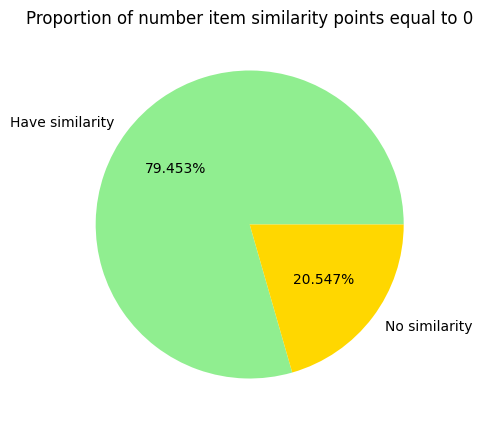

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie([126*126-array.sum(),array.sum()], labels=['Have similarity','No similarity'], colors=colors, autopct='%1.3f%%')
plt.title('Proportion of number item similarity points equal to 0')
plt.show()

## Create model

In [ ]:
def get_similar_course(course_name):
  similar_course = item_sim_df[course_name]
  similar_course = similar_course.sort_values(ascending=False)
  return similar_course

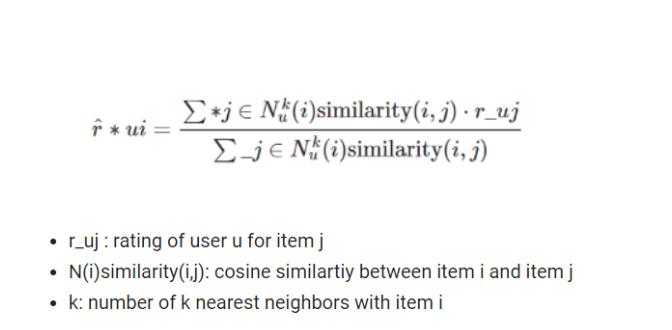

In [ ]:
class KNN:
  def __init__(self, train_set, k):
    self.train_set = train_set
    self.k = k

  def fill_data(self,course_name): #this is function that implement item-item method based on K nearest neighbours
    for i in self.train_set.index:
      bxh = get_similar_course(course_name)[1:(self.k)+1]
      sum1 = 0
      sum2 = 0
      for j in bxh.index:
        sum1 += bxh[j]*rating_sparse_df.loc[i,j]
        sum2 += abs(bxh[j])
      if self.train_set.loc[i, course_name] == 0:
        self.train_set.loc[i,course_name] = sum1/sum2

  def fill_all(self):
    for i in self.train_set.columns:
      fill_data(self.train_set,i,self.k)
      normalize_data(self.train_set[i])

  def fill_data2(self,course_name): #this is function that implement item-item method based on K nearest neighbours
    result = self.train_set.copy()
    for i in self.train_set.index:
        bxh = get_similar_course(course_name)[1:(self.k)+1]
        sum1 = 0
        sum2 = 0
        for j in bxh.index:
          sum1 += bxh[j]*rating_sparse_df.loc[i,j]
          sum2 += abs(bxh[j])
        if self.train_set.loc[i, course_name] == 0:
          result.loc[i,course_name] = sum1/sum2
    return result[course_name]


In [ ]:

def normalize_data(train_set):
    for i in train_set.columns:
      avg = train_set[i].sum()/(len(train_set.index)-len(train_set.loc[train_set[i]==0,i]))
      for j in train_set.index:
        if train_set.loc[j,i] != 0 and train_set.loc[j,i] != 3 and train_set.loc[j,i] != 2:
          if train_set.loc[j,i] >= avg:
            train_set.loc[j,i] = 3
          elif train_set.loc[j,i] < avg:
            train_set.loc[j,i] = 2

In [ ]:
def RMSE(train_set, test_set):


  # Calculate the difference between the predicted ratings and the actual ratings.
  differences = train_set - test_set

  # Square the differences.
  squared_differences = differences ** 2

  # Calculate the mean squared error.
  mean_squared_error = squared_differences.mean()

  # Take the square root of the mean squared error to get the RMSE.
  rmse = np.sqrt(mean_squared_error)

  return rmse



# Assessment

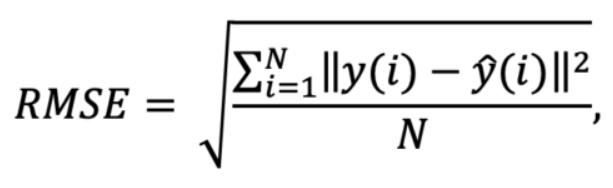

## Group 1: have highest similarity with each other items

In [ ]:
most_similar_column = item_sim_df.max(axis=0).sort_values(ascending=False).index[0]
most_similar_column

'DA0101EN'

In [ ]:
get_similar_course('DA0101EN')

DA0101EN      1.000000
DV0101EN      0.760875
PY0101EN      0.680904
ML0101ENv3    0.577509
DS0101EN      0.469943
                ...   
DB0113EN      0.000000
TMP0101EN     0.000000
BENTEST4      0.000000
DB0115EN      0.000000
ST0301EN      0.000000
Name: DA0101EN, Length: 126, dtype: float64

In [ ]:
DA0101EN_frame = train_set.DA0101EN.to_frame()
DA0101EN_frame.value_counts()

DA0101EN
0.0         25598
3.0          8303
dtype: int64

In [ ]:
train1 =  DA0101EN_frame[DA0101EN_frame['DA0101EN'] != 0].copy()
test1 =  DA0101EN_frame[DA0101EN_frame['DA0101EN'] != 0].copy()

In [ ]:
import random
for i in range(len(train1)):
  for j in range(len(train1.columns)):
    if random.random() < 0.1:
      train1.iloc[i, j] = 0

In [ ]:
knn_train = KNN(train1, 20)
result = knn_train.fill_data2('DA0101EN')
result = result.to_frame()
result.value_counts()

DA0101EN
3.000000    7466
0.967352      13
1.330591      10
1.101249      10
0.572564      10
            ... 
1.064730       1
1.070470       1
1.071189       1
1.071363       1
3.000000       1
Length: 641, dtype: int64

In [ ]:
normalize_data(result)

In [ ]:
    def normalize_data2(train_set):
        for i in train_set.columns:
          avg = train_set[i].sum()/(len(train_set.index)-len(train_set.loc[train_set[i]==0,i]))
          for j in train_set.index:
            if train_set.loc[j,i] != 0 and train_set.loc[j,i] != 3 and train_set.loc[j,i] != 2:
              if train_set.loc[j,i] >= avg-1:
                train_set.loc[j,i] = 3
              elif train_set.loc[j,i] < avg-1:
                train_set.loc[j,i] = 2
    normalize_data2(result)

In [ ]:
DA0101EN_frame = train_set.DA0101EN.to_frame()
DA0101EN_frame.value_counts()

DA0101EN
0.0         25598
3.0          8303
dtype: int64

In [ ]:
result.value_counts()

DA0101EN
3.0         7598
2.0          705
dtype: int64

In [ ]:
print(RMSE(result,test1))

DA0101EN    0.291392
dtype: float64


## Group 2: The value 3 more than the value of 2

In [ ]:
result = {}
for item in rating_sparse_df.columns:
  rate_3_count = len(rating_sparse_df[rating_sparse_df[item] == 3])


  result[item] = rate_3_count


sorted_result = sorted(result.items(), key=lambda x: x[1])
print(f'Item have the most number of 3 value : {sorted_result[-1][0]}')

Item have the most number of 3 value : PY0101EN


In [ ]:
get_similar_course('PY0101EN')

PY0101EN      1.000000
DA0101EN      0.680904
DS0101EN      0.625944
DV0101EN      0.616423
ML0101ENv3    0.615440
                ...   
PA0103EN      0.001929
ST0201EN      0.000000
ST0301EN      0.000000
DS0107        0.000000
BENTEST4      0.000000
Name: PY0101EN, Length: 126, dtype: float64

In [ ]:
PY0101EN_frame = train_set.PY0101EN.to_frame()
PY0101EN_frame.value_counts()

PY0101EN
0.0         18965
3.0         14922
2.0            14
dtype: int64

In [ ]:
train2 =  PY0101EN_frame[PY0101EN_frame['PY0101EN'] != 0].copy()
test2 =  PY0101EN_frame[PY0101EN_frame['PY0101EN'] != 0].copy()

In [ ]:
for i in range(len(train2)):
  for j in range(len(train2.columns)):
    if random.random() < 0.1:
      train2.iloc[i, j] = 0

In [ ]:
test2.value_counts()

PY0101EN
3.0         14922
2.0            14
dtype: int64

In [ ]:
train2.value_counts()

PY0101EN
3.0         13406
0.0          1520
2.0            10
dtype: int64

In [ ]:
knn_train = KNN(train2, 40)
result = knn_train.fill_data2('PY0101EN')
result = result.to_frame()
result.value_counts()

PY0101EN
3.000000    13406
2.000000       10
0.583776        8
0.454948        6
0.544815        6
            ...  
0.564903        1
0.563474        1
0.562463        1
0.562350        1
0.679449        1
Length: 1383, dtype: int64

In [ ]:
print(f'Mean of result: {result.mean()}')

Mean of result: PY0101EN    2.7716
dtype: float64


In [ ]:
result1 = result.copy()
result2 = result.copy()

In [ ]:
normalize_data(result1)

In [ ]:
def normalize_data2(train_set):
    for i in train_set.columns:
      avg = train_set[i].sum()/(len(train_set.index)-len(train_set.loc[train_set[i]==0,i]))
      for j in train_set.index:
        if train_set.loc[j,i] != 0 and train_set.loc[j,i] != 3 and train_set.loc[j,i] != 2:
          if train_set.loc[j,i] >= avg-2:
            train_set.loc[j,i] = 3
          elif train_set.loc[j,i] < avg-2:
            train_set.loc[j,i] = 2
normalize_data2(result2)

In [ ]:
result1.value_counts()

PY0101EN
3.0         13406
2.0          1527
0.0             3
dtype: int64

In [ ]:
result2.value_counts()

PY0101EN
3.0         13988
2.0           945
0.0             3
dtype: int64

In [ ]:
print(f'Test on result1 :{RMSE(result1,test2)}')

Test on result1 :PY0101EN    0.320685
dtype: float64


In [ ]:
print(f'Test on result2: {RMSE(result2,test2)}')

Test on result2: PY0101EN    0.25273
dtype: float64


## Group 3: The value 2 more than the value of 3

In [ ]:
result = {}
for item in rating_sparse_df.columns:
  rate_2_count = len(rating_sparse_df[rating_sparse_df[item] == 2])


  result[item] = rate_2_count


sorted_result = sorted(result.items(), key=lambda x: x[1])
print(f'Item have the most number of 2 value : {sorted_result[-1][0]}')


Item have the most number of 2 value : CNSC02EN


In [ ]:
CNSC02EN_frame = train_set.CNSC02EN.to_frame()
CNSC02EN_frame.value_counts()

CNSC02EN
0.0         32063
2.0          1838
dtype: int64

In [ ]:
CNSC02EN_frame = CNSC02EN_frame[CNSC02EN_frame['CNSC02EN'] != 0]
CNSC02EN_frame.value_counts()

CNSC02EN
2.0         1838
dtype: int64

In [ ]:
train3 = CNSC02EN_frame.copy()
test3 = CNSC02EN_frame.copy()

In [ ]:
# Randomly set 10% of the values in the train set to 0
for i in range(len(train3)):
  for j in range(len(train3.columns)):
    if random.random() < 0.1:
      train3.iloc[i, j] = 0

In [ ]:
test3.value_counts()

CNSC02EN
2.0         1838
dtype: int64

In [ ]:
train3.value_counts()

CNSC02EN
2.0         1647
0.0          191
dtype: int64

In [ ]:
knn_train = KNN(train3, 20)
result = knn_train.fill_data2('CNSC02EN')
result = result.to_frame()
result


,CNSC02EN
user,
5,2.0
50348,2.0
77114,2.0
82579,2.0
91852,2.0
...,...
2099543,2.0
2099941,0.0
2101370,2.0


In [ ]:
result.value_counts()

CNSC02EN
2.000000    1647
0.000000     165
0.100562       3
0.107948       2
0.832678       1
1.824546       1
1.760786       1
1.725192       1
1.488319       1
1.297900       1
0.924567       1
0.920803       1
0.916418       1
0.819816       1
0.825249       1
0.081575       1
0.700009       1
0.652774       1
0.617651       1
0.579648       1
0.524887       1
0.495289       1
0.428451       1
0.122362       1
2.202263       1
dtype: int64

In [ ]:
print(f'Mean of result {result.mean()}')

Mean of result CNSC02EN    1.803188
dtype: float64


In [ ]:
result1 = result.copy()
result2 = result.copy()

In [ ]:
normalize_data(result1)

In [ ]:
def normalize_data2(train_set):
    for i in train_set.columns:
      avg = train_set[i].sum()/(len(train_set.index)-len(train_set.loc[train_set[i]==0,i]))
      for j in train_set.index:
        if train_set.loc[j,i] != 0 and train_set.loc[j,i] != 3 and train_set.loc[j,i] != 2:
          if train_set.loc[j,i] > avg+0.5:
            train_set.loc[j,i] = 3
          elif train_set.loc[j,i] <= avg+0.5:
            train_set.loc[j,i] = 2
normalize_data2(result2)

In [ ]:
result1.value_counts()

CNSC02EN
2.0         1672
0.0          165
3.0            1
dtype: int64

In [ ]:
result2.value_counts()

CNSC02EN
2.0         1673
0.0          165
dtype: int64

In [ ]:
print(f'Test on result1 :{RMSE(result1,test3)}')

Test on result1 :CNSC02EN    0.599692
dtype: float64


In [ ]:
print(f'Test on result2: {RMSE(result2,test3)}')

Test on result2: CNSC02EN    0.599238
dtype: float64


In [ ]:
get_similar_course('CNSC02EN')[1:5]

HCC105EN    0.095628
HCC104EN    0.091833
SECM03EN    0.068882
DE0205EN    0.063232
Name: CNSC02EN, dtype: float64